# 1.4 Plots, Images, and Graphics
## Plots

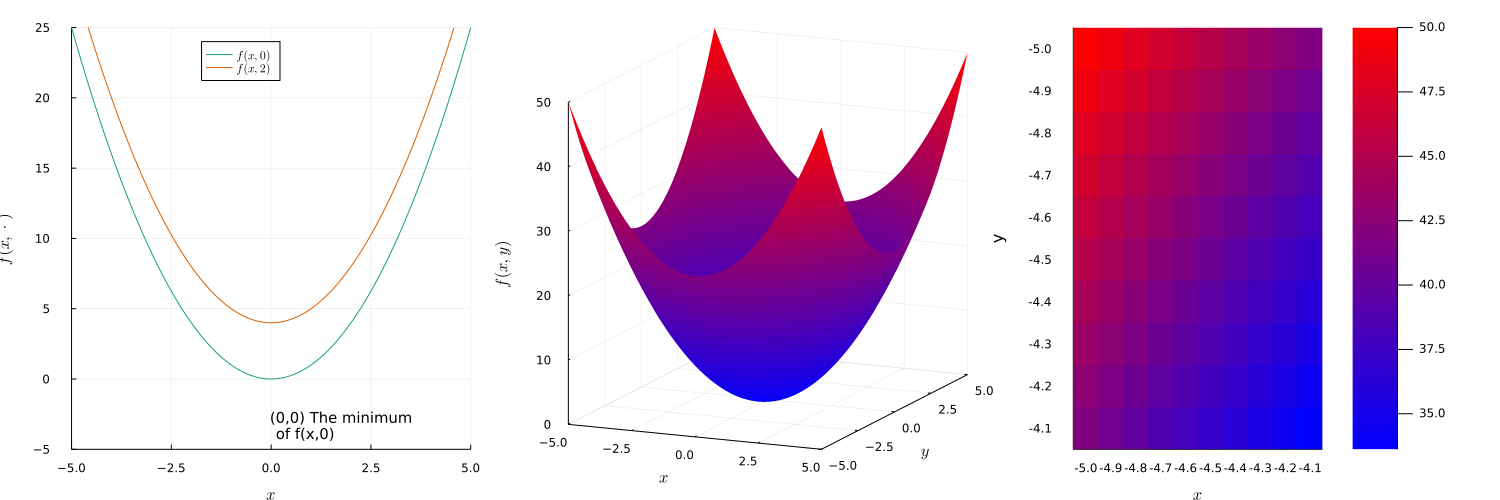

In [1]:
using Plots, LaTeXStrings, Measures;  

f(x,y) = x^2 + y^2
f0(x) = f(x,0)
f2(x) = f(x,2)

xVals, yVals = -5:0.1:5, -5:0.1:5
plot(xVals, [f0.(xVals), f2.(xVals)],
    palette=:Dark2_4, xlims=(-5,5), legend=:top,
    ylims=(-5,25), ylabel=L"f(x, \cdot)", label=[L"f(x,0)" L"f(x,2)"])
p1 = annotate!(0,-2, text("(0,0) The minimum\n of f(x,0)", :left, :top, 10))

z = [f(x,y) for y in yVals, x in xVals]
p2 = surface(xVals, yVals, z, c=cgrad([:blue, :red]), legend=:none,
    ylabel=L"y", zlabel=L"f(x,y)")

M = z[1:10, 1:10]
p3 = heatmap(M, c=cgrad([:blue, :red]), yflip=true, ylabel="y",
    xticks=([1:10;], xVals), yticks=([1:10;], yVals))

plot(p1, p2, p3, layout=(1,3), size=(1500,500), xlabel=L"x", margin=5mm)

## Histogram of Hailstone Sequence Lengths
$$
f(x)=\left\{
\begin{array}{ll}
x/2 & \text{if }x \text{ mod } 2 = 0,\\
3x + 1 & \text{if }x \text{ mod } 2 = 1,\\
\end{array}
\right.
$$

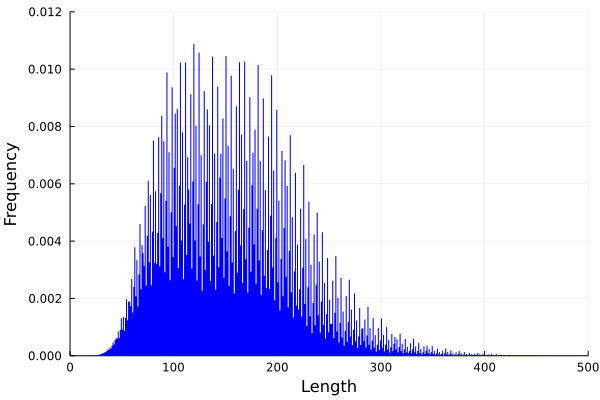

In [2]:
using Plots

function hailLength(x::Int)
    n = 0
    while x != 1
        if x % 2 == 0
            x = Int(x/2)
        else
            x = 3x + 1
        end
        n += 1
    end
    return n
end

lengths = [hailLength(x0) for x0 in 2:10^7]

histogram(lengths, bins=1000, normed=:true,
    fill=(:blue, true), la=0, legend=:none,
    xlims=(0, 500), ylims=(0, 0.012),
    xlabel="Length", ylabel="Frequency")

## Creating Animations
$$
Z_{n} = e^{2\pi i \frac{k}{n}} \quad \text{for } k = 1,\cdots,n.
$$

┌ Info: Saved animation to 
│   fn = /home/zpp/Documents/SWJ/JupyterNB/Chap01/graph.gif
└ @ Plots /home/zpp/.julia/packages/Plots/FI0vT/src/animation.jl:114


Plots.AnimatedGif("/home/zpp/Documents/SWJ/JupyterNB/Chap01/graph.gif")
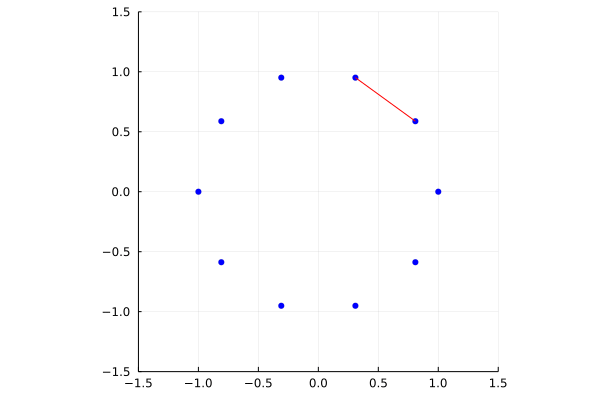

In [3]:
using Plots

function graphCreator(n::Int)
    vertices = 1:n
    complexPts = [exp(2*π*im*k/n) for k in vertices]
    coords = [(real(p), imag(p)) for p in complexPts]
    xPts = first.(coords)
    yPts = last.(coords)
    edges = []
    for v in vertices, u in (v+1):n
        push!(edges, (v,u))
    end
    
    anim = Animation()
    scatter(xPts, yPts, c=:blue, msw=0, ratio=1,
        xlims=(-1.5,1.5), ylims=(-1.5,1.5), legend=:none)
    
    for i in 1:length(edges)
        u, v = edges[i][1], edges[i][2]
        xpoints = [xPts[u],xPts[v]]
        ypoints = [yPts[u],yPts[v]]
        plot!(xpoints, ypoints, line=(:red))
        frame(anim)
    end

    gif(anim, "graph.gif", fps=60)
end

graphCreator(10)

## Raster Images

Highest intensity pixel: (0.9999999999999999, CartesianIndex(192, 168))


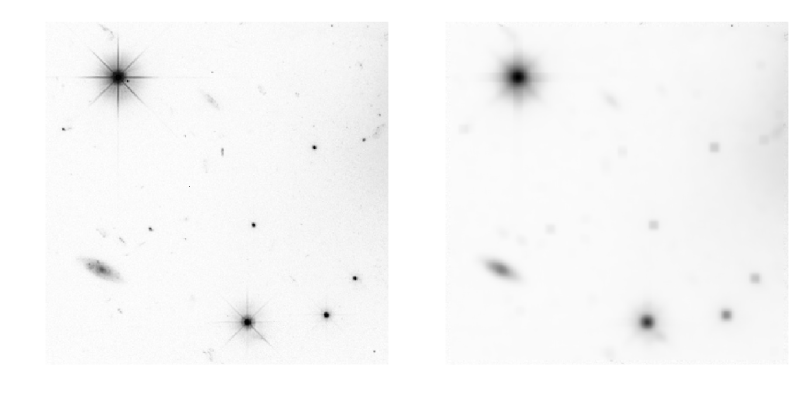

In [4]:
using Plots, Images
gr()

img = load("../data/stars.png")
gImg = red.(img)*0.299 + green.(img)*0.587 + blue.(img)*0.114
rows, cols = size(img)

println("Highest intensity pixel: ", findmax(gImg))

function boxBlur(image, x, y, d)
    if x<=d || y<=d || x>=cols-d || y>=rows-d
        return image[x,y]
    else
        total = 0.0
        for xi = x-d:x+d
            for yi = y-d:y+d
                total += image[xi,yi]
            end
        end
        return total/((2d+1)^2)
    end
end

blurImg = [boxBlur(gImg, x, y,5) for x in 1:cols, y in 1:rows]

yOriginal, xOriginal = argmax(gImg).I
yBoxBlur, xBoxBlur = argmax(blurImg).I

p1 = heatmap(gImg, c=:Greys, yflip=true)
p1 = scatter!((xOriginal, yOriginal), ms=60, ma=0, msw=4, msc=:red)
p2 = heatmap(blurImg, c=:Greys, yflip=true)
p2 = scatter!((xBoxBlur, yBoxBlur), ms=60, ma=0, msw=4, msc=:red)

plot(p1, p2, size=(800,400), ratio=:equal, xlims=(0,cols), ylims=(0,rows),
    colorbar_entry=false, border=:none,legend=:none)